<a href="https://colab.research.google.com/github/Sambasivarao-Gorantla/diabetes-classification/blob/main/diabetes_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# downloading the data

In [1]:
!kaggle datasets download -d priyamchoksi/100000-diabetes-clinical-dataset
!unzip 100000-diabetes-clinical-dataset.zip

Dataset URL: https://www.kaggle.com/datasets/priyamchoksi/100000-diabetes-clinical-dataset
License(s): MIT
  0% 0.00/896k [00:00<?, ?B/s]
100% 896k/896k [00:00<00:00, 19.8MB/s]
Archive:  100000-diabetes-clinical-dataset.zip
  inflating: diabetes_dataset.csv    


# importing essential packages and loading the data

In [2]:
import os

# data manipulation
import numpy as np
import pandas as pd

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

# machine learning
import sklearn

In [3]:
data = pd.read_csv('/content/diabetes_dataset.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   year                  100000 non-null  int64  
 1   gender                100000 non-null  object 
 2   age                   100000 non-null  float64
 3   location              100000 non-null  object 
 4   race:AfricanAmerican  100000 non-null  int64  
 5   race:Asian            100000 non-null  int64  
 6   race:Caucasian        100000 non-null  int64  
 7   race:Hispanic         100000 non-null  int64  
 8   race:Other            100000 non-null  int64  
 9   hypertension          100000 non-null  int64  
 10  heart_disease         100000 non-null  int64  
 11  smoking_history       100000 non-null  object 
 12  bmi                   100000 non-null  float64
 13  hbA1c_level           100000 non-null  float64
 14  blood_glucose_level   100000 non-null  int64  
 15  d

In [4]:
data.head()

,year,gender,age,location,race:AfricanAmerican,race:Asian,race:Caucasian,race:Hispanic,race:Other,hypertension,heart_disease,smoking_history,bmi,hbA1c_level,blood_glucose_level,diabetes
0,2020,Female,32.0,Alabama,0,0,0,0,1,0,0,never,27.32,5.0,100,0
1,2015,Female,29.0,Alabama,0,1,0,0,0,0,0,never,19.95,5.0,90,0
2,2015,Male,18.0,Alabama,0,0,0,0,1,0,0,never,23.76,4.8,160,0
3,2015,Male,41.0,Alabama,0,0,1,0,0,0,0,never,27.32,4.0,159,0
4,2016,Female,52.0,Alabama,1,0,0,0,0,0,0,never,23.75,6.5,90,0


# data manipulation

In [5]:
# checking for missing values
data.isna().any()

year                    False
gender                  False
age                     False
location                False
race:AfricanAmerican    False
race:Asian              False
race:Caucasian          False
race:Hispanic           False
race:Other              False
hypertension            False
heart_disease           False
smoking_history         False
bmi                     False
hbA1c_level             False
blood_glucose_level     False
diabetes                False
dtype: bool

there are no missing values in the above dataset

In [6]:
# checking for duplicates
data.duplicated().any()

True

In [7]:
data[data.duplicated()].index

Index([ 2848, 21662, 23313, 33506, 43401, 57881, 59507, 61867, 65311, 71285,
       73971, 76007, 79363, 84085],
      dtype='int64')

In [8]:
data.drop_duplicates(inplace=True)

duplicate instances are removed from the dataset

# Data visualizations

<Axes: xlabel='diabetes', ylabel='count'>

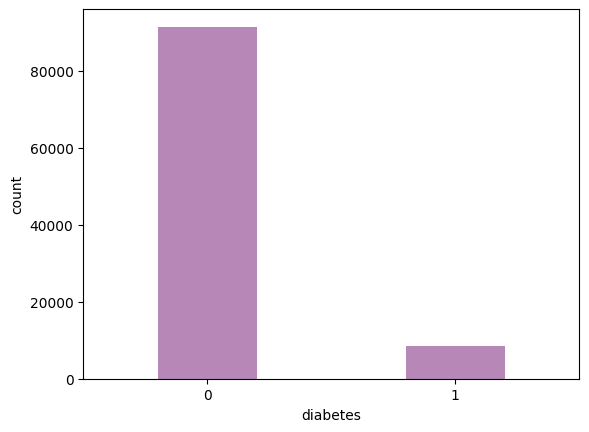

In [9]:
sns.countplot(x=data['diabetes'], width = 0.4, alpha = 0.5, color = 'purple')

<Axes: xlabel='diabetes', ylabel='count'>

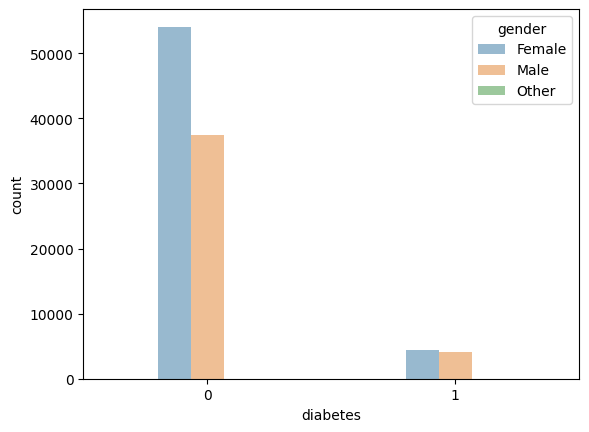

In [10]:
sns.countplot(x=data['diabetes'], hue=data['gender'], width = 0.4, alpha = 0.5)

<Axes: xlabel='diabetes', ylabel='count'>

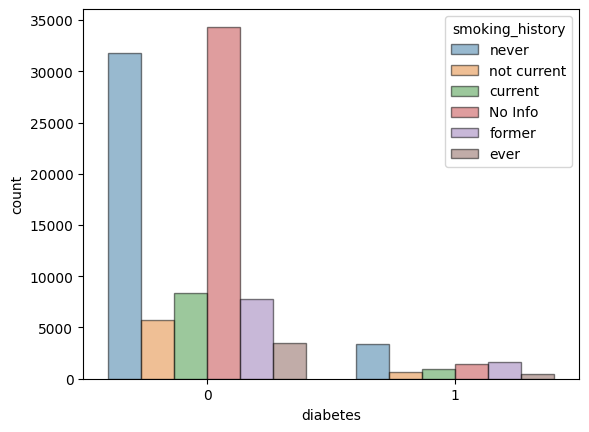

In [11]:
sns.countplot(x=data['diabetes'], hue=data['smoking_history'], alpha = 0.5, ec = 'k' )

<Axes: xlabel='diabetes', ylabel='count'>

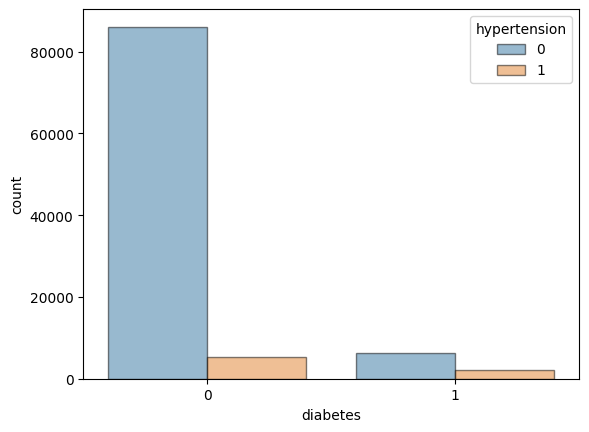

In [12]:
sns.countplot(x=data['diabetes'], hue=data['hypertension'], alpha = 0.5, ec = 'k' )

<Axes: xlabel='diabetes', ylabel='count'>

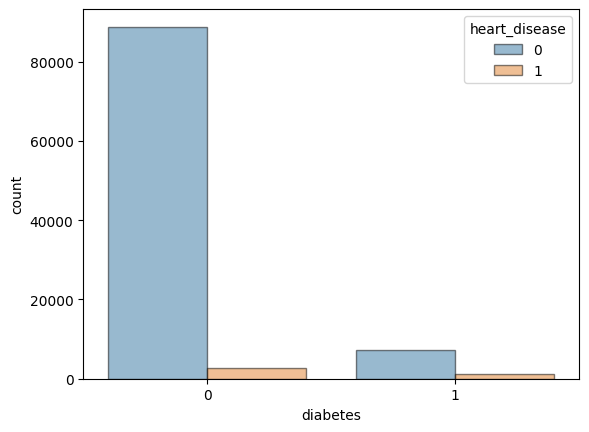

In [13]:
sns.countplot(x=data['diabetes'], hue=data['heart_disease'], alpha = 0.5, ec = 'k' )

Text(0.5, 1.0, 'Age distribution of diabetic patients')

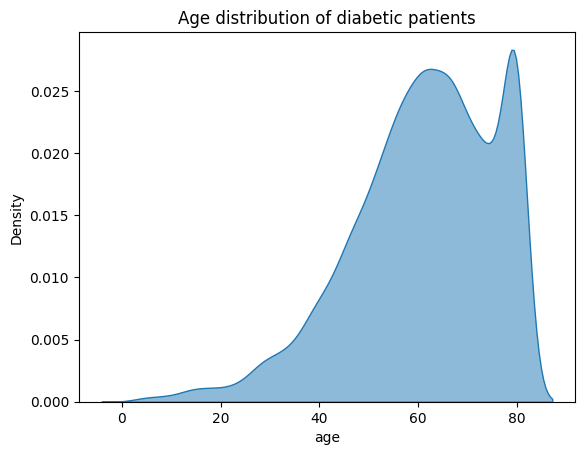

In [14]:
sns.kdeplot(x=data[data['diabetes'] == 1]['age'], alpha = 0.5, fill = True )
plt.title('Age distribution of diabetic patients')

Text(0.5, 1.0, 'BMI distribution of non-diabetic patients')

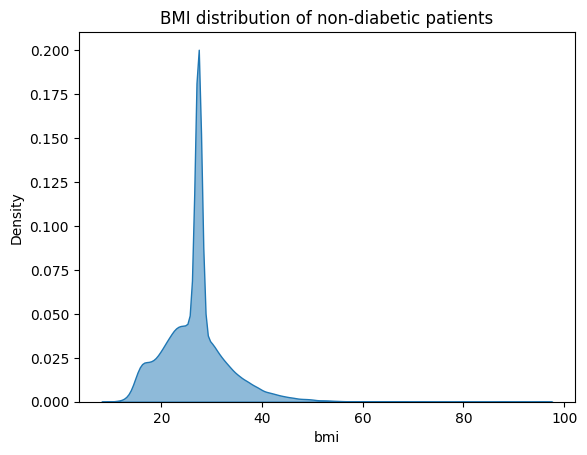

In [15]:
sns.kdeplot(x=data[data['diabetes'] == 0]['bmi'], alpha = 0.5, fill = True )
plt.title('BMI distribution of non-diabetic patients')

Text(0.5, 1.0, 'BMI distribution of diabetic patients')

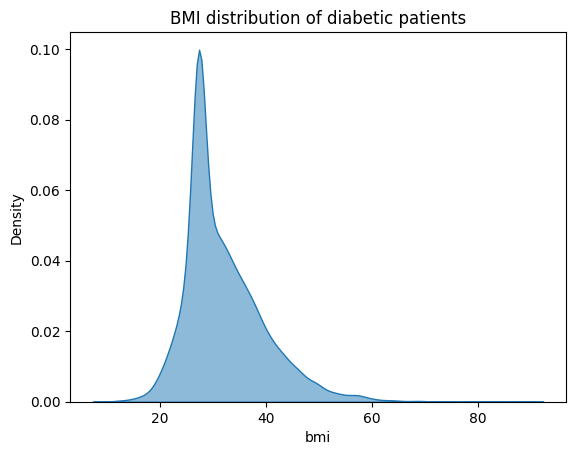

In [16]:
sns.kdeplot(x=data[data['diabetes'] == 1]['bmi'], alpha = 0.5, fill = True )
plt.title('BMI distribution of diabetic patients')

# data transformations

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99986 entries, 0 to 99999
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   year                  99986 non-null  int64  
 1   gender                99986 non-null  object 
 2   age                   99986 non-null  float64
 3   location              99986 non-null  object 
 4   race:AfricanAmerican  99986 non-null  int64  
 5   race:Asian            99986 non-null  int64  
 6   race:Caucasian        99986 non-null  int64  
 7   race:Hispanic         99986 non-null  int64  
 8   race:Other            99986 non-null  int64  
 9   hypertension          99986 non-null  int64  
 10  heart_disease         99986 non-null  int64  
 11  smoking_history       99986 non-null  object 
 12  bmi                   99986 non-null  float64
 13  hbA1c_level           99986 non-null  float64
 14  blood_glucose_level   99986 non-null  int64  
 15  diabetes              99

aggregating all the race columns into one

In [18]:
race_columns = [col for col in data.columns if col.startswith('race')]
data['race'] = data[race_columns].idxmax(axis=1)
data.drop(columns=race_columns, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99986 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   year                 99986 non-null  int64  
 1   gender               99986 non-null  object 
 2   age                  99986 non-null  float64
 3   location             99986 non-null  object 
 4   hypertension         99986 non-null  int64  
 5   heart_disease        99986 non-null  int64  
 6   smoking_history      99986 non-null  object 
 7   bmi                  99986 non-null  float64
 8   hbA1c_level          99986 non-null  float64
 9   blood_glucose_level  99986 non-null  int64  
 10  diabetes             99986 non-null  int64  
 11  race                 99986 non-null  object 
dtypes: float64(3), int64(5), object(4)
memory usage: 9.9+ MB


transforming the 'object' columns

In [19]:
from sklearn.preprocessing import OneHotEncoder
onehot_encoder = OneHotEncoder()
data['gender'] = onehot_encoder.fit_transform(data[['gender']]).toarray()
data['smoking_history'] = onehot_encoder.fit_transform(data[['smoking_history']]).toarray()
data['location'] = onehot_encoder.fit_transform(data[['location']]).toarray()
data['race'] = onehot_encoder.fit_transform(data[['race']]).toarray()

In [20]:
data_features = data.drop(columns=['diabetes'])
data_target = data['diabetes']

In [21]:
from imblearn.over_sampling import SMOTENC
smote_nc = SMOTENC(categorical_features=[1,3,4,5,6,10], random_state=42)
data_features_sampled, data_target_sampled = smote_nc.fit_resample(data_features, data_target)

# splitting the dataset

In [22]:
from sklearn.model_selection import train_test_split

X_train,X_test, y_train, y_test  = train_test_split(data_features_sampled, data_target_sampled, test_size=0.2,stratify = data_target_sampled,  random_state=42)

In [23]:
(X_train.shape, y_train.shape)

((146377, 11), (146377,))

In [24]:
(X_test.shape, y_test.shape)

((36595, 11), (36595,))

# building the models

In [25]:
models = pd.DataFrame(columns=['model', 'accuracy', 'recall_for_positives'])

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

log_reg = Pipeline([
    ('scaler', StandardScaler()),
    ('log_reg', LogisticRegression())
])

log_reg.fit(X_train, y_train)


Pipeline(steps=[('scaler', StandardScaler()),
                ('log_reg', LogisticRegression())])

In [27]:
log_reg.score(X_test, y_test)

0.8949310015029376

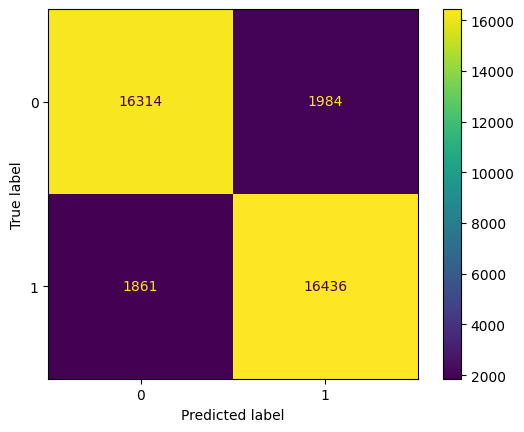

In [28]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(log_reg, X_test, y_test)

In [29]:
from sklearn.metrics import classification_report
print(classification_report(y_test, log_reg.predict(X_test)))

              precision    recall  f1-score   support

           0       0.90      0.89      0.89     18298
           1       0.89      0.90      0.90     18297

    accuracy                           0.89     36595
   macro avg       0.89      0.89      0.89     36595
weighted avg       0.89      0.89      0.89     36595



In [30]:
models.loc[len(models)] = ['Logistic Regression', log_reg.score(X_test, y_test), 0.90]

### RandomForestClassifier

In [31]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators = 300, random_state = 42, max_depth = 15)
rnd_clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=15, n_estimators=300, random_state=42)

In [32]:
rnd_clf.score(X_test, y_test)

0.951714715125017

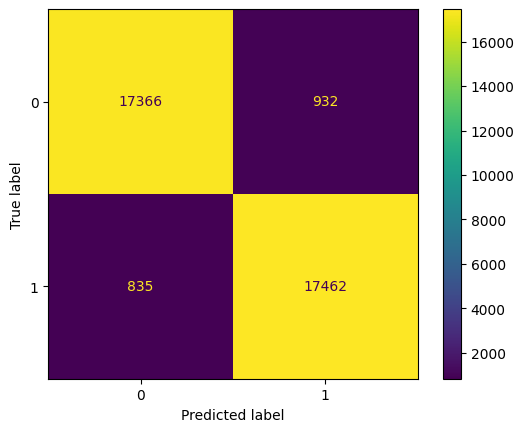

In [33]:
ConfusionMatrixDisplay.from_estimator(rnd_clf, X_test, y_test)

In [34]:
print(classification_report(y_test, rnd_clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95     18298
           1       0.95      0.95      0.95     18297

    accuracy                           0.95     36595
   macro avg       0.95      0.95      0.95     36595
weighted avg       0.95      0.95      0.95     36595



In [35]:
models.loc[len(models)] = ['RandomForestClassifier', rnd_clf.score(X_test, y_test), 0.95]

### KNeighbours Classifier

In [36]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier(n_neighbors = 3)
knn_clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [37]:
knn_clf.score(X_test, y_test)

0.9430523295532176

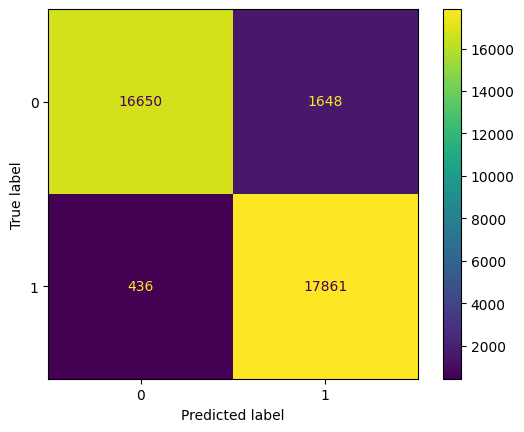

In [38]:
ConfusionMatrixDisplay.from_estimator(knn_clf, X_test, y_test)

In [39]:
print(classification_report(y_test, knn_clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.97      0.91      0.94     18298
           1       0.92      0.98      0.94     18297

    accuracy                           0.94     36595
   macro avg       0.95      0.94      0.94     36595
weighted avg       0.95      0.94      0.94     36595



In [40]:
models.loc[len(models)] = ['KNeighbours Classifier', knn_clf.score(X_test, y_test), 0.98]

### XGB classifier

In [41]:
from xgboost import XGBClassifier

xgb_clf = XGBClassifier()
xgb_clf.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [42]:
xgb_clf.score(X_test, y_test)

0.9728104932367809

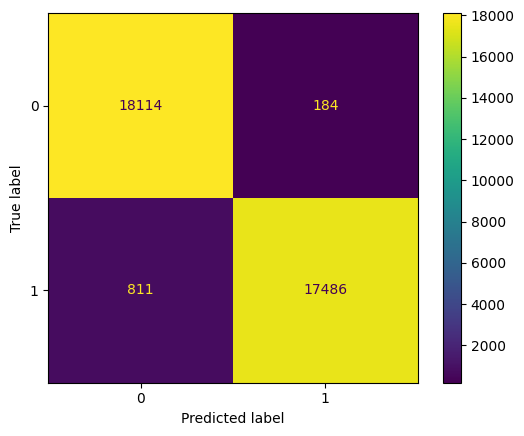

In [43]:
ConfusionMatrixDisplay.from_estimator(xgb_clf, X_test, y_test)

In [44]:
print(classification_report(y_test, xgb_clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97     18298
           1       0.99      0.96      0.97     18297

    accuracy                           0.97     36595
   macro avg       0.97      0.97      0.97     36595
weighted avg       0.97      0.97      0.97     36595



In [45]:
models.loc[len(models)] = ['XGB classifier', xgb_clf.score(X_test, y_test), 0.96]

### stacking Classifier

In [46]:
from sklearn.ensemble import StackingClassifier
from sklearn.svm import SVC
stack_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('stack', StackingClassifier(
        estimators=[
            ('log_reg', LogisticRegression()),
            ('rnd_clf', RandomForestClassifier()),
            #('svc', SVC()),
            ('xgb_clf', XGBClassifier())
        ],
        final_estimator=LogisticRegression()
    ))
])

stack_clf.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('stack',
                 StackingClassifier(estimators=[('log_reg',
                                                 LogisticRegression()),
                                                ('rnd_clf',
                                                 RandomForestClassifier()),
                                                ('xgb_clf',
                                                 XGBClassifier(base_score=None,
                                                               booster=None,
                                                               callbacks=None,
                                                               colsample_bylevel=None,
                                                               colsample_bynode=None,
                                                               colsample_bytree=None,
                                                               device=None,
                                                               early_stopping_rounds=None,
                                                               enable_categorical=Fa...
                                                               interaction_constraints=None,
                                                               learning_rate=None,
                                                               max_bin=None,
                                                               max_cat_threshold=None,
                                                               max_cat_to_onehot=None,
                                                               max_delta_step=None,
                                                               max_depth=None,
                                                               max_leaves=None,
                                                               min_child_weight=None,
                                                               missing=nan,
                                                               monotone_constraints=None,
                                                               multi_strategy=None,
                                                               n_estimators=None,
                                                               n_jobs=None,
                                                               num_parallel_tree=None,
                                                               random_state=None, ...))],
                                    final_estimator=LogisticRegression()))])

In [47]:
stack_clf.score(X_test, y_test)

0.9800245935237054

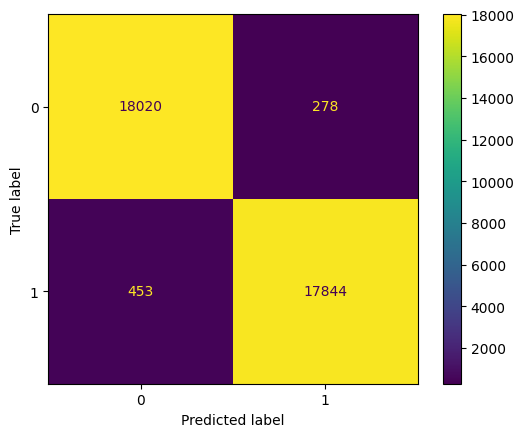

In [48]:
ConfusionMatrixDisplay.from_estimator(stack_clf, X_test, y_test)

In [49]:
print(classification_report(y_test, stack_clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98     18298
           1       0.98      0.98      0.98     18297

    accuracy                           0.98     36595
   macro avg       0.98      0.98      0.98     36595
weighted avg       0.98      0.98      0.98     36595



In [51]:
models.loc[len(models)] = ['Stacking Classifier', stack_clf.score(X_test, y_test), 0.98]

# conclusion

In [53]:
models.sort_values(by='accuracy', ascending=False)

,model,accuracy,recall_for_positives
4,Stacking Classifier,0.980025,0.98
3,XGB classifier,0.972810,0.96
1,RandomForestClassifier,0.951715,0.95
2,KNeighbours Classifier,0.943052,0.98
0,Logistic Regression,0.894931,0.90


**From the above observations, we can use the Stacking Classifier for inferences**